<a href="https://colab.research.google.com/github/Dysuza/Datascience/blob/main/project_bill_predictn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
file_path = '/content/Project.xlsx'
data = pd.read_excel(file_path)
print(data.head())

            Name  Age  Gender Blood Type Medical Condition Date of Admission  \
0  Bobby JacksOn   30    Male         B-            Cancer        2024-01-31   
1   LesLie TErRy   62    Male         A+           Obesity        2019-08-20   
2    DaNnY sMitH   76  Female         A-           Obesity        2022-09-22   
3   andrEw waTtS   28  Female         O+          Diabetes        2020-11-18   
4  adrIENNE bEll   43  Female        AB+            Cancer        2022-09-19   

             Doctor                    Hospital Insurance Provider  \
0     Matthew Smith             Sons and Miller         Blue Cross   
1   Samantha Davies                     Kim Inc           Medicare   
2  Tiffany Mitchell                    Cook PLC              Aetna   
3       Kevin Wells  Hernandez Rogers and Vang,           Medicare   
4    Kathleen Hanna                 White-White              Aetna   

   Billing Amount  Room Number Admission Type Discharge Date   Medication  \
0    18856.281306    

In [ ]:
print(data.describe())
print(data.info())

                Age              Date of Admission  Billing Amount  \
count  55500.000000                          55500    55500.000000   
mean      51.539459  2021-11-01 01:02:22.443243008    25539.316097   
min       13.000000            2019-05-08 00:00:00    -2008.492140   
25%       35.000000            2020-07-28 00:00:00    13241.224652   
50%       52.000000            2021-11-01 00:00:00    25538.069376   
75%       68.000000            2023-02-03 00:00:00    37820.508436   
max       89.000000            2024-05-07 00:00:00    52764.276736   
std       19.602454                            NaN    14211.454431   

        Room Number                 Discharge Date  
count  55500.000000                          55500  
mean     301.134829  2021-11-16 13:15:20.821621504  
min      101.000000            2019-05-09 00:00:00  
25%      202.000000            2020-08-12 00:00:00  
50%      302.000000            2021-11-17 00:00:00  
75%      401.000000            2023-02-18 00:00:00 

In [ ]:
missing_values = data.isnull().sum()
print(missing_values)

Name                  0
Age                   0
Gender                0
Blood Type            0
Medical Condition     0
Date of Admission     0
Doctor                0
Hospital              0
Insurance Provider    0
Billing Amount        0
Room Number           0
Admission Type        0
Discharge Date        0
Medication            0
Test Results          0
dtype: int64


In [ ]:
data.shape

(55500, 15)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                55500 non-null  object        
 1   Age                 55500 non-null  int64         
 2   Gender              55500 non-null  object        
 3   Blood Type          55500 non-null  object        
 4   Medical Condition   55500 non-null  object        
 5   Date of Admission   55500 non-null  datetime64[ns]
 6   Doctor              55500 non-null  object        
 7   Hospital            55500 non-null  object        
 8   Insurance Provider  55500 non-null  object        
 9   Billing Amount      55500 non-null  float64       
 10  Room Number         55500 non-null  int64         
 11  Admission Type      55500 non-null  object        
 12  Discharge Date      55500 non-null  datetime64[ns]
 13  Medication          55500 non-null  object    

In [ ]:
data.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Bobby JacksOn,30,Male,B-,Cancer,2024-01-31,Matthew Smith,Sons and Miller,Blue Cross,18856.281306,328,Urgent,2024-02-02,Paracetamol,Normal
1,LesLie TErRy,62,Male,A+,Obesity,2019-08-20,Samantha Davies,Kim Inc,Medicare,33643.327287,265,Emergency,2019-08-26,Ibuprofen,Inconclusive
2,DaNnY sMitH,76,Female,A-,Obesity,2022-09-22,Tiffany Mitchell,Cook PLC,Aetna,27955.096079,205,Emergency,2022-10-07,Aspirin,Normal
3,andrEw waTtS,28,Female,O+,Diabetes,2020-11-18,Kevin Wells,"Hernandez Rogers and Vang,",Medicare,37909.782410,450,Elective,2020-12-18,Ibuprofen,Abnormal
4,adrIENNE bEll,43,Female,AB+,Cancer,2022-09-19,Kathleen Hanna,White-White,Aetna,14238.317814,458,Urgent,2022-10-09,Penicillin,Abnormal


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in data.columns:
    if data[col].dtype == 'object' or data[col].dtype == 'category':
        data[col] = le.fit_transform(data[col])
print(data.head())


    Name  Age  Gender  Blood Type  Medical Condition Date of Admission  \
0   3068   30       1           5                  2        2024-01-31   
1  15211   62       1           0                  5        2019-08-20   
2   6476   76       0           1                  5        2022-09-22   
3  26935   28       0           6                  3        2020-11-18   
4  26241   43       0           2                  2        2022-09-19   

   Doctor  Hospital  Insurance Provider  Billing Amount  Room Number  \
0   26612     29933                   1    18856.281306          328   
1   33648     16012                   3    33643.327287          265   
2   37828      5473                   0    27955.096079          205   
3   22511     12317                   3    37909.782410          450   
4   21259     33598                   0    14238.317814          458   

   Admission Type Discharge Date  Medication  Test Results  
0               2     2024-02-02           3             2  


Outliers in column 'Name':
Empty DataFrame
Columns: [Name, Age, Gender, Blood Type, Medical Condition, Date of Admission, Doctor, Hospital, Insurance Provider, Billing Amount, Room Number, Admission Type, Discharge Date, Medication, Test Results]
Index: []
Outliers in column 'Age':
Empty DataFrame
Columns: [Name, Age, Gender, Blood Type, Medical Condition, Date of Admission, Doctor, Hospital, Insurance Provider, Billing Amount, Room Number, Admission Type, Discharge Date, Medication, Test Results]
Index: []
Outliers in column 'Gender':
Empty DataFrame
Columns: [Name, Age, Gender, Blood Type, Medical Condition, Date of Admission, Doctor, Hospital, Insurance Provider, Billing Amount, Room Number, Admission Type, Discharge Date, Medication, Test Results]
Index: []
Outliers in column 'Blood Type':
Empty DataFrame
Columns: [Name, Age, Gender, Blood Type, Medical Condition, Date of Admission, Doctor, Hospital, Insurance Provider, Billing Amount, Room Number, Admission Type, Discharge Date, M

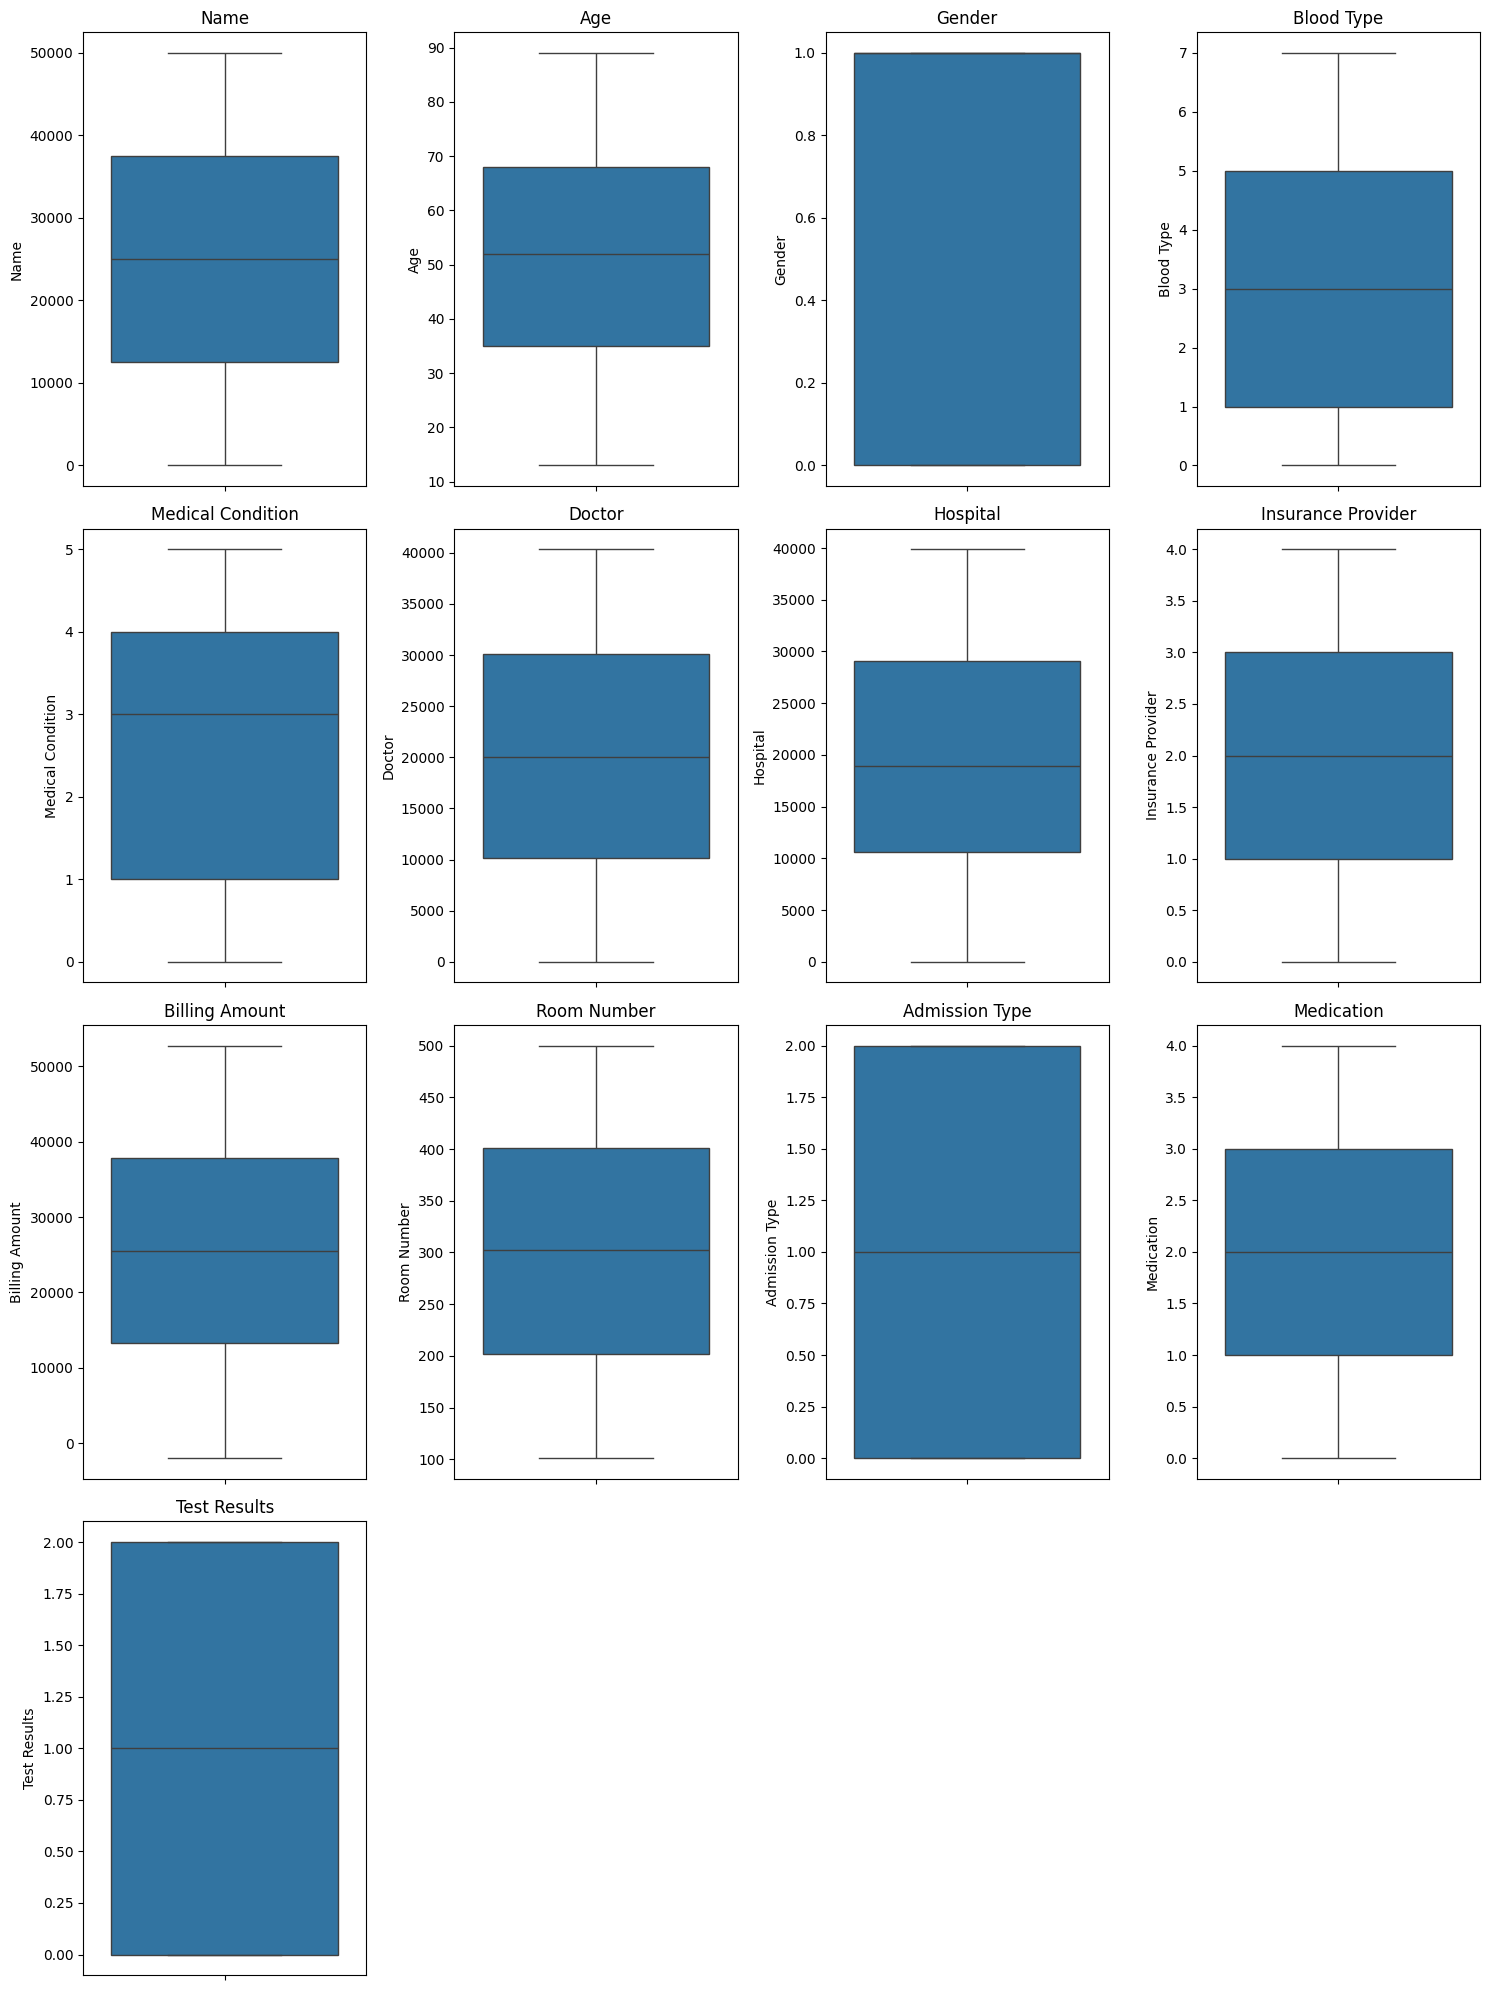

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
def identify_outliers(df):
    outliers = {}
    for col in df.columns:
        if pd.api.types.is_numeric_dtype(df[col]):
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers

outliers = identify_outliers(data)

for col, outlier_df in outliers.items():
    print(f"Outliers in column '{col}':")
    print(outlier_df)
num_cols = data.select_dtypes(include=['number']).shape[1]
num_rows = (num_cols + 3) // 4

plt.figure(figsize=(15, 5 * num_rows))
for i, col in enumerate(data.select_dtypes(include=['number']).columns):
    plt.subplot(num_rows, 4, i + 1)
    sns.boxplot(y=data[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [ ]:
data.shape

(55500, 15)

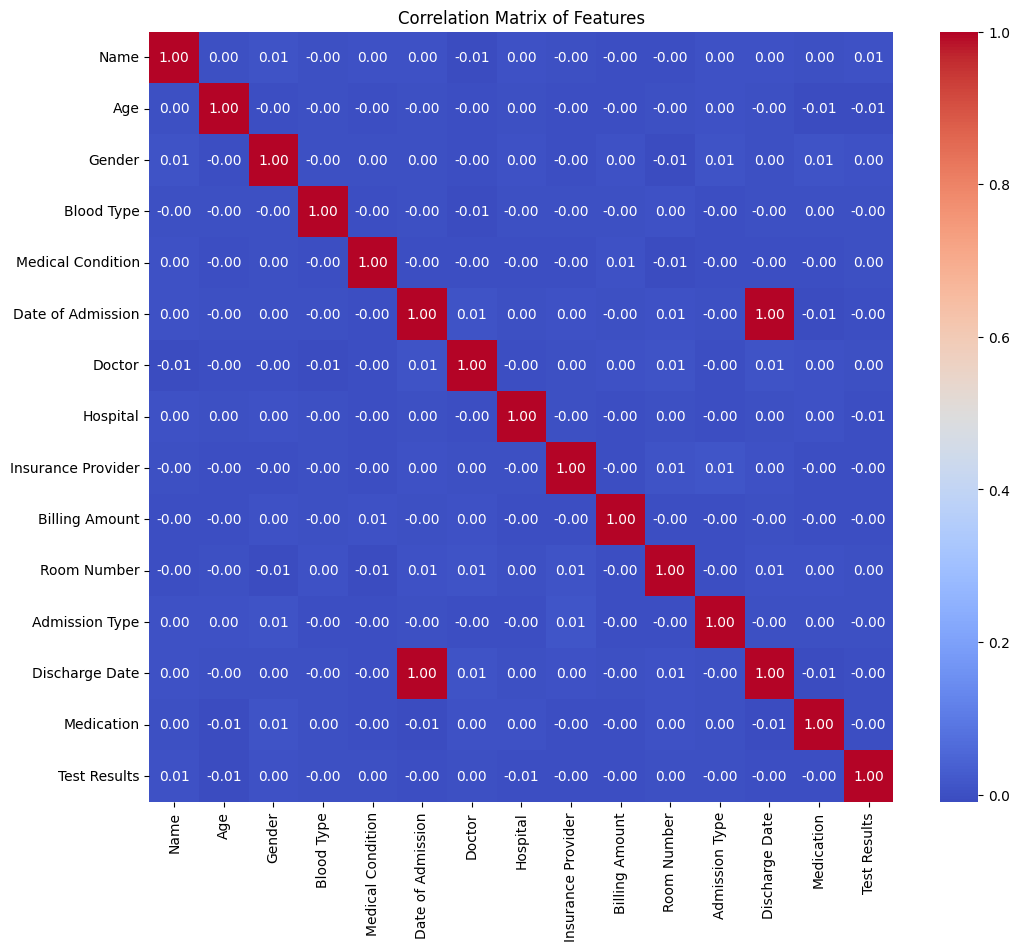

In [ ]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_cols = data.select_dtypes(include=['number']).columns
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])
print(data.head())

       Name       Age  Gender  Blood Type  Medical Condition  \
0  0.061371  0.223684     1.0    0.714286                0.4   
1  0.304275  0.644737     1.0    0.000000                1.0   
2  0.129543  0.828947     0.0    0.142857                1.0   
3  0.538797  0.197368     0.0    0.857143                0.6   
4  0.524914  0.394737     0.0    0.285714                0.4   

  Date of Admission    Doctor  Hospital  Insurance Provider  Billing Amount  \
0        2024-01-31  0.659693  0.750671                0.25        0.380933   
1        2019-08-20  0.834110  0.401555                0.75        0.650904   
2        2022-09-22  0.937729  0.137254                0.00        0.547053   
3        2020-11-18  0.558032  0.308890                0.75        0.728798   
4        2022-09-19  0.526996  0.842583                0.00        0.296622   

   Room Number  Admission Type Discharge Date  Medication  Test Results  
0     0.568922             1.0     2024-02-02        0.75         

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
X = data.drop('Billing Amount', axis=1)
y = data['Billing Amount']
datetime_cols = X.select_dtypes(include=['datetime64']).columns
for col in datetime_cols:
    X[col] = X[col].astype('int64') // 10**9
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)
y_pred = rf_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.05958668914815089
R-squared: 0.10128218597783367


In [ ]:
data.shape

(55500, 15)

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler

file_path = '/content/Project.xlsx'
data = pd.read_excel(file_path)
X = data.drop('Billing Amount', axis=1)
y = data['Billing Amount']

datetime_cols = X.select_dtypes(include=['datetime64']).columns

for col in datetime_cols:
    X[col] = X[col].astype('int64') // 10**9
X = X.select_dtypes(include=['number'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
import xgboost as xgb

xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_regressor.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_regressor.predict(X_test_scaled)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"XGBoost Regressor")
print(f"Mean Squared Error: {mse_xgb}")
print(f"R-squared: {r2_xgb}")

XGBoost Regressor
Mean Squared Error: 203053310.5970519
R-squared: -0.020833180864480605


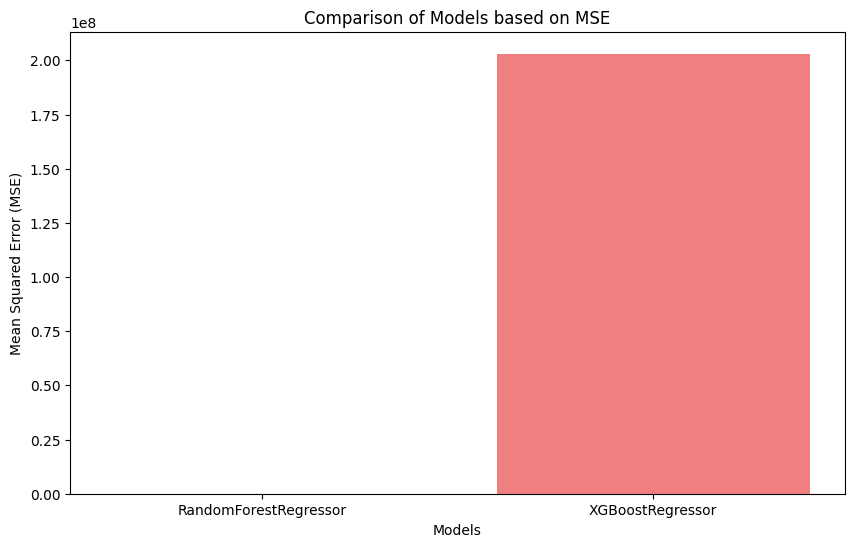

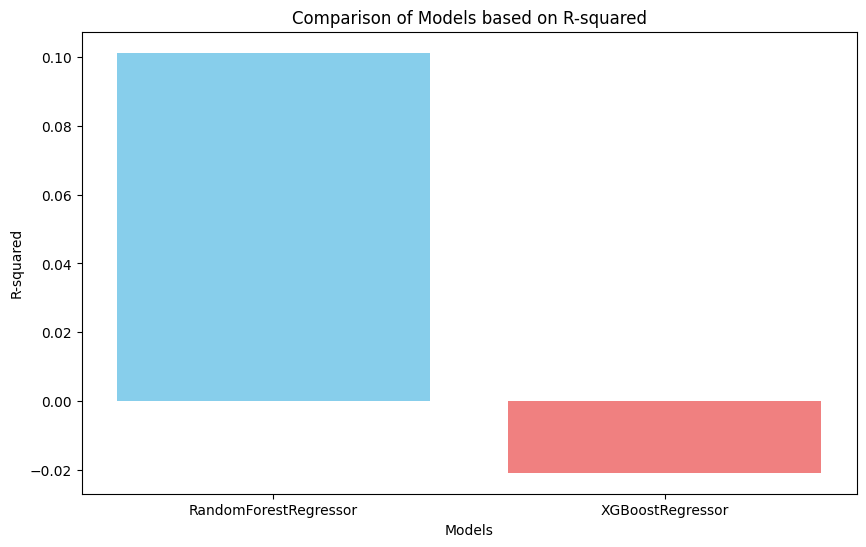

In [ ]:
import matplotlib.pyplot as plt
model_names = ['RandomForestRegressor', 'XGBoostRegressor']
mse_values = [mse, mse_xgb]
r2_values = [r2, r2_xgb]
plt.figure(figsize=(10, 6))
plt.bar(model_names, mse_values, color=['skyblue', 'lightcoral'])
plt.xlabel("Models")
plt.ylabel("Mean Squared Error (MSE)")
plt.title("Comparison of Models based on MSE")
plt.show()
plt.figure(figsize=(10, 6))
plt.bar(model_names, r2_values, color=['skyblue', 'lightcoral'])
plt.xlabel("Models")
plt.ylabel("R-squared")
plt.title("Comparison of Models based on R-squared")
plt.show()

In [ ]:
data['Date of Admission'] = pd.to_datetime(data['Date of Admission'])
data['Discharge Date'] = pd.to_datetime(data['Discharge Date'])
data['days_stayed'] = (data['Discharge Date'] - data['Date of Admission']).dt.days
print(data[['Date of Admission', 'Discharge Date', 'days_stayed']].head())


  Date of Admission Discharge Date  days_stayed
0        2024-01-31     2024-02-02            2
1        2019-08-20     2019-08-26            6
2        2022-09-22     2022-10-07           15
3        2020-11-18     2020-12-18           30
4        2022-09-19     2022-10-09           20


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Name                55500 non-null  object        
 1   Age                 55500 non-null  int64         
 2   Gender              55500 non-null  object        
 3   Blood Type          55500 non-null  object        
 4   Medical Condition   55500 non-null  object        
 5   Date of Admission   55500 non-null  datetime64[ns]
 6   Doctor              55500 non-null  object        
 7   Hospital            55500 non-null  object        
 8   Insurance Provider  55500 non-null  object        
 9   Billing Amount      55500 non-null  float64       
 10  Room Number         55500 non-null  int64         
 11  Admission Type      55500 non-null  object        
 12  Discharge Date      55500 non-null  datetime64[ns]
 13  Medication          55500 non-null  object    

In [ ]:
data.columns


Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results', 'days_stayed'],
      dtype='object')

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

file_path = '/content/Project.xlsx'
data = pd.read_excel(file_path)
columns_to_remove = ['Name', 'Age', 'Blood Type', 'Date of Admission', 'Doctor', 'Hospital', 'Room Number','Discharge Date', 'Test Results']
data = data.drop(columns=columns_to_remove, errors='ignore')

In [ ]:
data.head()

,Gender,Medical Condition,Insurance Provider,Billing Amount,Admission Type,Medication
0,Male,Cancer,Blue Cross,18856.281306,Urgent,Paracetamol
1,Male,Obesity,Medicare,33643.327287,Emergency,Ibuprofen
2,Female,Obesity,Aetna,27955.096079,Emergency,Aspirin
3,Female,Diabetes,Medicare,37909.782410,Elective,Ibuprofen
4,Female,Cancer,Aetna,14238.317814,Urgent,Penicillin


In [ ]:
le = LabelEncoder()
for col in data.columns:
    if data[col].dtype == 'object':
        data[col] = le.fit_transform(data[col])

In [ ]:
data.head()

,Gender,Medical Condition,Insurance Provider,Billing Amount,Admission Type,Medication
0,1,2,1,18856.281306,2,3
1,1,5,3,33643.327287,1,1
2,0,5,0,27955.096079,1,0
3,0,3,3,37909.782410,0,1
4,0,2,0,14238.317814,2,4


In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
numerical_cols = data.select_dtypes(include=['number']).columns
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])
print(data.head())

   Gender  Medical Condition  Insurance Provider  Billing Amount  \
0     0.0          -0.333333                -0.5       -0.271846   
1     0.0           0.666667                 0.5        0.329760   
2    -1.0           0.666667                -1.0        0.098336   
3    -1.0           0.000000                 0.5        0.503339   
4    -1.0          -0.333333                -1.0       -0.459727   

   Admission Type  Medication  
0             0.5         0.5  
1             0.0        -0.5  
2             0.0        -1.0  
3            -0.5        -0.5  
4             0.5         1.0  


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
X = data.drop('Billing Amount', axis=1)
y = data['Billing Amount']
datetime_cols = X.select_dtypes(include=['datetime64']).columns
for col in datetime_cols:
    X[col] = X[col].astype('int64') // 10**9
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)
y_pred = rf_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.3366221199311662
R-squared: -0.022411678238975163


In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler

file_path = '/content/Project.xlsx'
data = pd.read_excel(file_path)
X = data.drop('Billing Amount', axis=1)
y = data['Billing Amount']

datetime_cols = X.select_dtypes(include=['datetime64']).columns

for col in datetime_cols:
    X[col] = X[col].astype('int64') // 10**9
X = X.select_dtypes(include=['number'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
import xgboost as xgb

xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_regressor.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_regressor.predict(X_test_scaled)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"XGBoost Regressor")
print(f"Mean Squared Error: {mse_xgb}")
print(f"R-squared: {r2_xgb}")

XGBoost Regressor
Mean Squared Error: 203053310.5970519
R-squared: -0.020833180864480605


In [ ]:
import joblib
joblib.dump(rf_regressor, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [ ]:
import pickle
with open('random_forest_model.pkl', 'wb') as file:
    pickle.dump(rf_regressor, file)

In [ ]:
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

In [ ]:
import joblib
import pickle
with open('label_encoder.pkl', 'wb') as file:
    pickle.dump(le, file)

In [ ]:
import joblib
import pickle
with open('label_encoder.pkl', 'wb') as file:
    pickle.dump(le, file)